In [1]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from loader import load_news_data
import matplotlib.pyplot as plt
import seaborn as sns
import talib             
import pynance as py  
import quantstats as qs 
import numpy as np
import pandas as pd


df = load_news_data('../data/GOOG.csv')
print(df.head())
print(df.columns)

Loading data from ../data/GOOG.csv...
         Date     Close      High       Low      Open     Volume
0  2009-01-02  7.948608  7.960977  7.557264  7.633949  144961322
1  2009-01-05  8.115089  8.194003  7.792268  7.940692  196293007
2  2009-01-06  8.263762  8.430492  8.074027  8.237046  257971329
3  2009-01-07  7.965677  8.185839  7.885034  8.121770  180453860
4  2009-01-08  8.044340  8.044340  7.850152  7.873406  144567852
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [2]:
# Clean stock data

# Remove rows with missing values
data = df.dropna()

# Ensure correct data types
for col in ['Open','High','Low','Close','Volume']:
    data[col] = data[col].astype(float)

         count          mean           std            min           25%  \
Close   3774.0  5.077997e+01  3.941744e+01       6.994490  1.685109e+01   
High    3774.0  5.128516e+01  3.985330e+01       7.408840  1.698442e+01   
Low     3774.0  5.025235e+01  3.897505e+01       6.994490  1.669939e+01   
Open    3774.0  5.075353e+01  3.938974e+01       7.133018  1.682765e+01   
Volume  3774.0  6.123096e+07  5.537396e+07  158434.000000  2.574863e+07   

                 50%           75%           max  
Close   3.732780e+01  6.919150e+01  1.496847e+02  
High    3.764767e+01  7.008489e+01  1.510662e+02  
Low     3.703879e+01  6.836883e+01  1.488688e+02  
Open    3.738839e+01  6.906288e+01  1.508313e+02  
Volume  3.797798e+07  8.269781e+07  5.952147e+08  


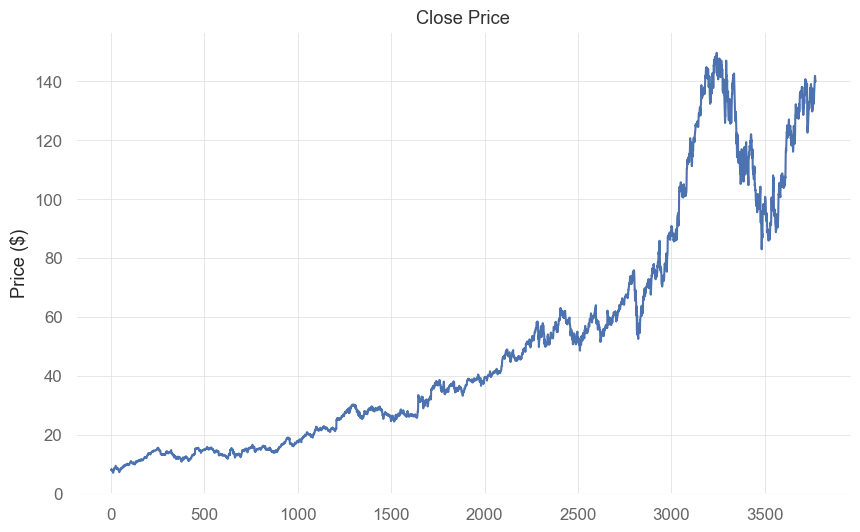

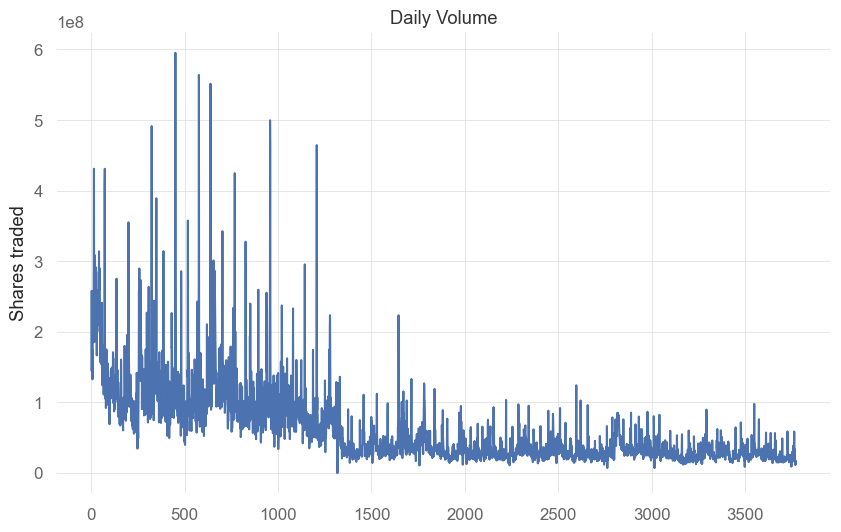

In [3]:
print(data.describe().T)

# Close price chart
data["Close"].plot(title="Close Price")
plt.ylabel("Price ($)")
plt.show()

# Volume chart
data["Volume"].plot(title="Daily Volume")
plt.ylabel("Shares traded")
plt.show()


In [4]:

if "Adj Close" in data.columns:
    price = data["Adj Close"]
else:
    price = data["Close"]

# --- Moving Averages ---
data["SMA_20"] = talib.SMA(price, timeperiod=20)
data["SMA_50"] = talib.SMA(price, timeperiod=50)
data["EMA_20"] = talib.EMA(price, timeperiod=20)

# --- RSI ---
data["RSI_14"] = talib.RSI(price, timeperiod=14)

# --- MACD ---
data["MACD"], data["MACD_signal"], data["MACD_hist"] = talib.MACD(
    price, fastperiod=12, slowperiod=26, signalperiod=9
)



data.tail()

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
3769,2023-12-22,141.750000,142.276397,141.089511,141.164014,18513500.0,135.009596,133.914786,135.854576,64.953309,1.412015,0.572046,0.839969
3770,2023-12-26,141.849304,142.966658,141.531472,142.008205,11170100.0,135.246477,133.999010,136.425503,65.115870,1.706565,0.798950,0.907615
3771,2023-12-27,140.478683,142.345911,140.092320,141.859236,17288400.0,135.386520,134.017881,136.811520,60.916026,1.808553,1.000870,0.807682
3772,2023-12-28,140.319748,141.303025,139.870824,140.885881,12192500.0,135.628861,134.023641,137.145637,60.429303,1.855168,1.171730,0.683438
3773,2023-12-29,139.972137,140.473710,138.949139,139.723837,14881000.0,135.976979,134.056417,137.414827,59.313063,1.842820,1.305948,0.536872


In [5]:
from pynance import portfolio_optimizer as po

TICKERS = ["GOOG", "AMZN","AAPL","MSFT", "META", "NVDA"]

# Create the portfolio calculations object
portfolio = po.PortfolioCalculations(TICKERS)

print("=== Max Sharpe Portfolio (risk/return) ===")
print(portfolio.max_sharpe_portfolio("rr"))

print("\n=== Max Sharpe Portfolio weights ===")
print(portfolio.max_sharpe_portfolio("df").head())

print("\n=== Min Variance Portfolio (risk/return) ===")
print(portfolio.min_var_portfolio("rr"))

print("\n=== Min Variance Portfolio weights ===")
print(portfolio.min_var_portfolio("df").head())

c:\Users\Abenezer\Desktop\KAIM Project\nova-financial-analytics-week1\venv2\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\Abenezer\Desktop\KAIM Project\nova-financial-analytics-week1\venv2\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\Abenezer\Desktop\KAIM Project\nova-financial-analytics-week1\venv2\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is depr

=== Max Sharpe Portfolio (risk/return) ===
                   Max Sharpe Portfolio
Expected Return                  61.96%
Standard Deviation               35.59%

=== Max Sharpe Portfolio weights ===
     Portfolio Weight
GOOG           47.22%
AMZN            0.00%
AAPL            0.00%
MSFT            0.00%
META            0.00%

=== Min Variance Portfolio (risk/return) ===
                   Min Var Portfolio
Expected Return               22.17%
Standard Deviation            20.03%

=== Min Variance Portfolio weights ===
     Portfolio Weight
GOOG           15.39%
AMZN            0.00%
AAPL           36.41%
MSFT           47.22%
META            0.98%


Price & Moving Averages


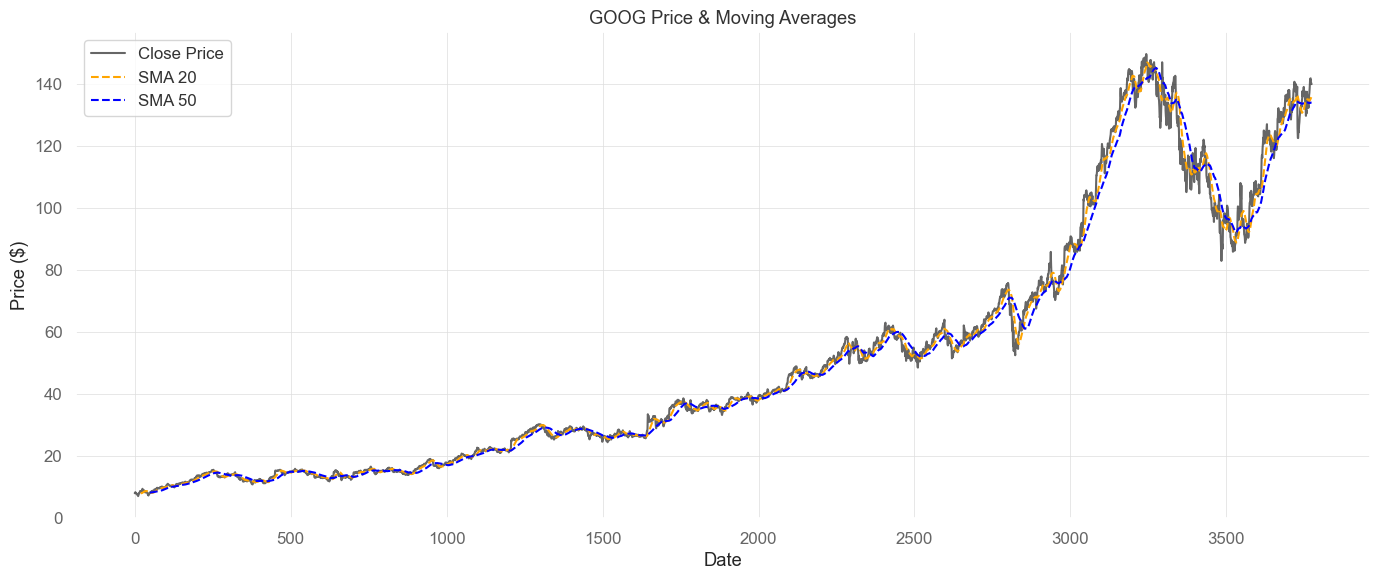

In [6]:

print("Price & Moving Averages")
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='black', alpha=0.6)
plt.plot(data.index, data['SMA_20'], label='SMA 20', color='orange', linestyle='--')
plt.plot(data.index, data['SMA_50'], label='SMA 50', color='blue', linestyle='--')

plt.title('GOOG Price & Moving Averages')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

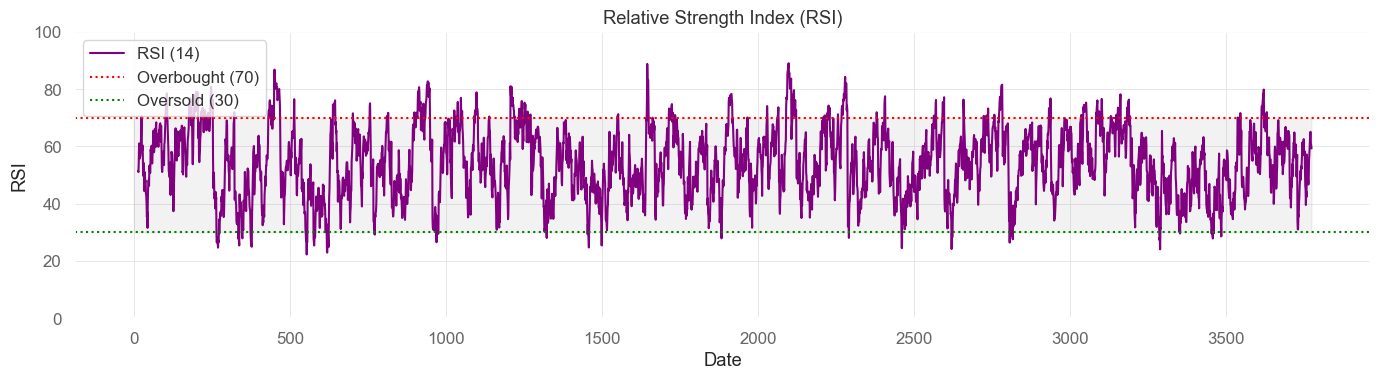

In [7]:
plt.figure(figsize=(14, 4))
plt.plot(data.index, data['RSI_14'], label='RSI (14)', color='purple')

# Add thresholds
plt.axhline(70, color='red', linestyle=':', label='Overbought (70)')
plt.axhline(30, color='green', linestyle=':', label='Oversold (30)')
plt.fill_between(data.index, 70, 30, color='gray', alpha=0.1)

plt.title('Relative Strength Index (RSI)')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



Subplot 3: MACD


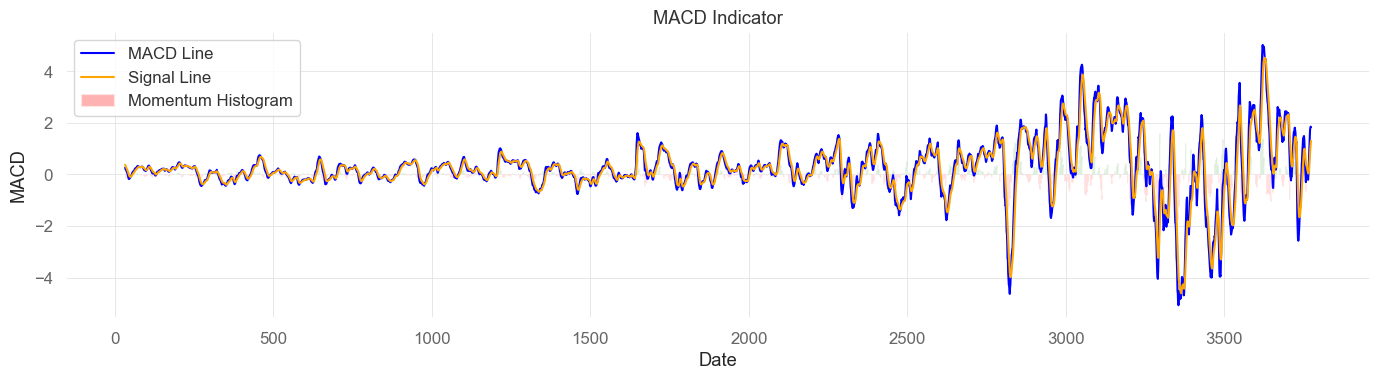

In [8]:
print("Subplot 3: MACD")

plt.figure(figsize=(14, 4))
plt.plot(data.index, data['MACD'], label='MACD Line', color='blue')
plt.plot(data.index, data['MACD_signal'], label='Signal Line', color='orange')

# Color histogram bars based on value
colors = ['green' if v >= 0 else 'red' for v in data['MACD_hist']]
plt.bar(data.index, data['MACD_hist'], color=colors, alpha=0.3, label='Momentum Histogram')

plt.title('MACD Indicator')
plt.ylabel('MACD')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()